<div style="text-align: left;">
    <img src="Logo_UNIR.png" alt="Logo" style="position: absolute; top: 0; right: 0; width: 250px; float: right;">
     <div>
        <h1>Simulación del proceso de Wiener</h1>
        <p>Dr. Miguel Angel Navarro Burgos</p>
        <p>Máster Universitario en Ingeniería Matemática y Computación</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas</p>
    </div>
</div>

**Definición: Proceso estocástico (PE)**

Sea $(\Omega,\mathcal{F}_{\Omega},P)$ un espacio de probabilidad. Un PE es una familia de variables aleatorias indexadas, que generalmente representa el tiempo $t$. Sea $T\subset\mathbb{R}$, se dice que $X\equiv X(t)\equiv\{X(t)(\omega):t\in T,\omega\in\Omega\}$ es un PE si $X(t)$ es una variable aleatoria para cada $t\in T$.

**Definición: PE de Wiener**

Sea $\{W(t): t\geq 0\}$ un PE. Decimos que es un PE de Wiener o un movimiento Browniano si cumple las siguientes condiciones:

- **Condición 1:** Empieza en $0$ con probabilidad $1$.
$$P\left[\{\omega\in\Omega:W(0)(\omega)=0\}\right]=P\left[\{W(0)=0\}\right]=1.$$

- **Condición 2:** Tiene incrementos estacionarios, es decir, para todo $h > 0$, se tiene que
$$W(s)-W(t)=W(s+h)-W(t+h),\,\forall s,t\in[0,+\infty[.$$

- **Condición 3:** Tiene incrementos independientes, es decir, para todo $0\leq t_1<t_2 <\cdots<t_n<+\infty$, las variables aleatorias 
$$W(t_2)-W(t_1), W(t_3)-W(t_2),\ldots,W(t_n)-W(t_{n-1}),$$ 
son independientes.

- **Condición 4:** Tiene incrementos gausianos con media $0$ y con varianza la diferencia de la ventana temporal del incremento, es decir que para todo $t,s\geq0$ se tiene que
$$W(t)-W(s)\sim N(0,|t-s|).$$

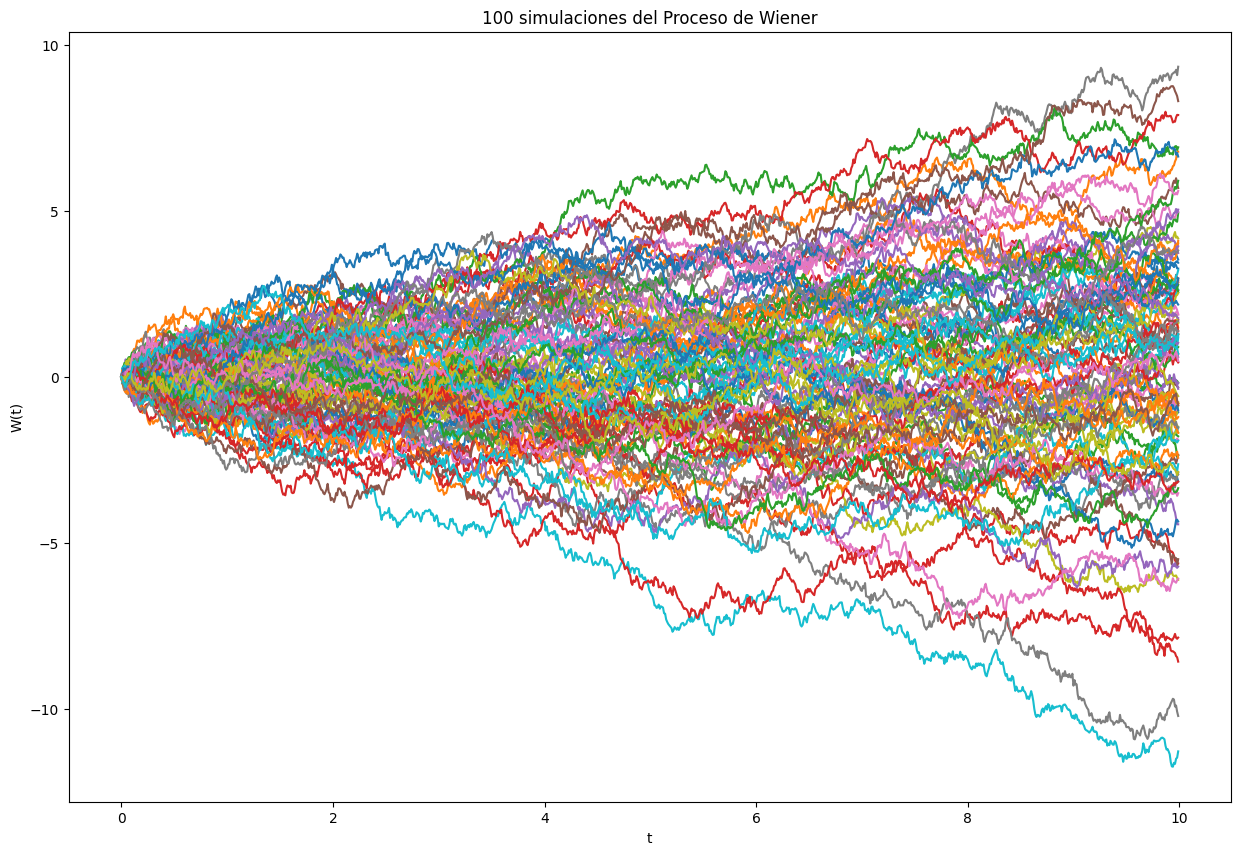

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
num_simulations = 100  # Número de simulaciones a mostrar
num_steps = 1000       # Número de pasos en cada simulación
delta_t = 0.01         # Tamaño del paso de tiempo

# Lista para almacenar todas las simulaciones del proceso de Wiener
simulations = []

# Simular el proceso de Wiener varias veces
for _ in range(num_simulations):
    # Inicializar el valor inicial del proceso de Wiener
    w_values = [0.0]
    
    # Simular los pasos de tiempo
    for _ in range(num_steps - 1):
        # Generar un incremento aleatorio de Wiener
        w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
        # Calcular el siguiente valor del proceso de Wiener
        w_values.append(w_values[-1] + w_increment)
    
    # Agregar las simulaciones a la lista
    simulations.append(w_values)

# Gráfica de las simulaciones del proceso de Wiener
plt.figure(figsize=(15, 10))
for w_values in simulations:
    plt.plot(np.arange(0, num_steps) * delta_t, w_values)

# Configuración del título y etiquetas de los ejes
plt.title(f'{num_simulations} simulaciones del Proceso de Wiener')
plt.xlabel('t')
plt.ylabel('W(t)')

# Mostrar la gráfica
plt.show()


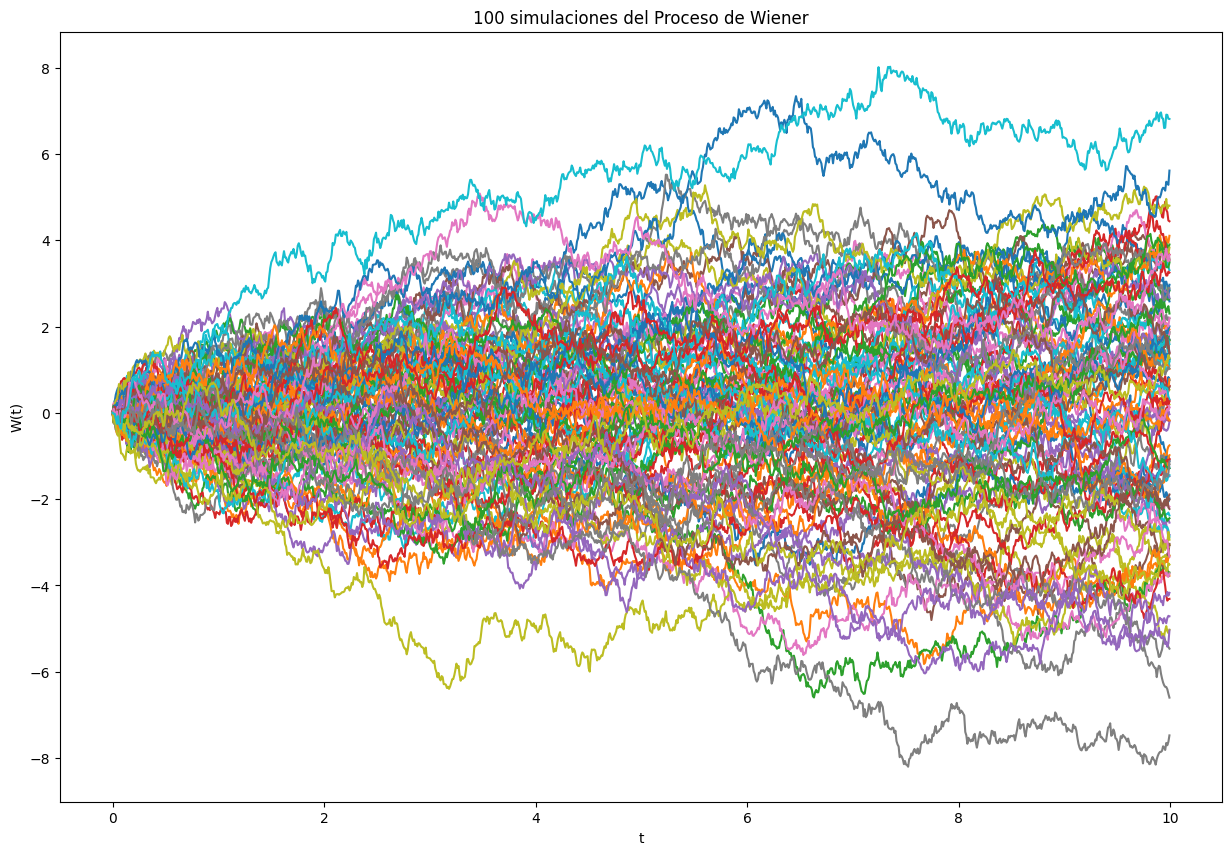

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
num_simulations = 100  # Número de simulaciones a mostrar
num_steps = 1000     # Número de pasos en cada simulación
delta_t = 0.01       # Tamaño del paso de tiempo

# Crear una matriz para almacenar todas las simulaciones
simulations = []

# Simular el proceso de Wiener varias veces
for _ in range(num_simulations):
    w_values = np.zeros(num_steps)
    for i in range(1, num_steps):
        # Genera una muestra aleatoria de una distribución normal
        w_increment = np.sqrt(delta_t)*np.random.normal(0,1)
        # Calcula el nuevo valor de W(t)
        w_values[i] = w_values[i - 1] + w_increment
    simulations.append(w_values)

# Gráfica de las simulaciones del proceso de Wiener
plt.figure(figsize=(15, 10))
for i, w_values in enumerate(simulations):
    plt.plot(np.arange(0, num_steps) * delta_t, w_values)#, label=f'Simulación {i+1}')

# Configuración del título y etiquetas de los ejes
plt.title(f'{num_simulations} simulaciones del Proceso de Wiener')
plt.xlabel('t')
plt.ylabel('W(t)')

# Mostrar la gráfica
plt.show()


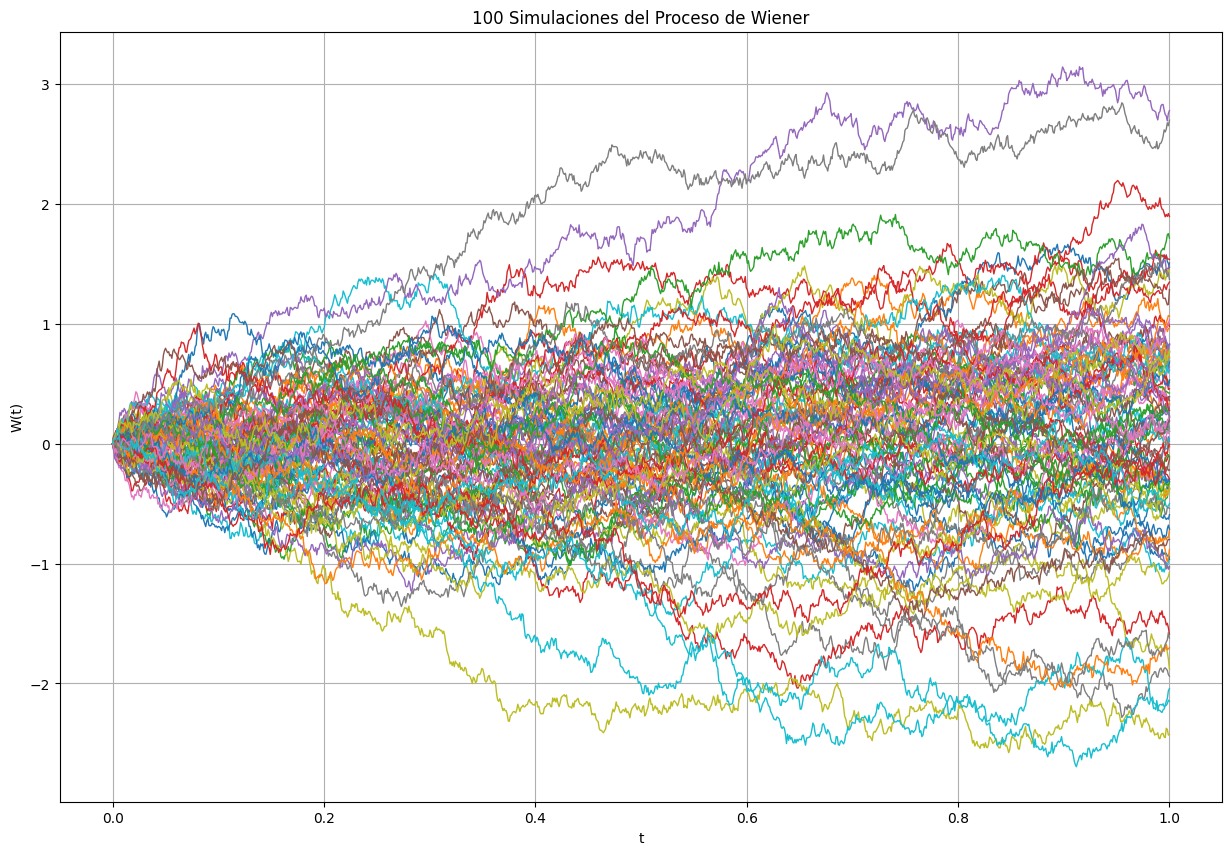

In [12]:
import sdepy
import numpy as np
import matplotlib.pyplot as plt

@sdepy.integrate
def wiener_process(t, x0=0, kappa=0, theta=0, sigma=1):
    return {'dt': kappa * (theta - x0), 'dw': sigma}

# Parámetros de la simulación
T = 1.0  # Tiempo final
N = 1000  # Número de pasos
M = 100  # Número de trayectorias a simular
times = np.linspace(0, T, N)

# Simular M trayectorias del proceso de Wiener
paths = np.array([wiener_process(x0=0, paths=1)(times) for _ in range(M)])

# Gráfica de las simulaciones del proceso de Wiener
plt.figure(figsize=(15, 10))

for i in range(M):
    # Asegurándonos de que cada trayectoria tenga las dimensiones correctas
    plt.plot(times, paths[i].squeeze(), lw=1)  # Usamos 'squeeze' para eliminar dimensiones de tamaño 1

plt.title(f'{M} Simulaciones del Proceso de Wiener')
plt.xlabel('t')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

In [8]:
import numpy as np

def VI(s, K, text):
    op = int(text == 'call')
    return np.maximum((1 - 2 * op) * (K - s), 0)

def comp(s, K, text):
    op = (1 - 2 * (text == 'call')) * (K - s)
    return np.where(op > 0, 'ITM', np.where(op < 0, 'OTM', 'ATM'))

In [9]:
text = 'call'
s = 100
K = np.array([90, 95, 100, 105, 110])
C = np.array([12, 10, 8, 6, 4])  # call
n = len(K)

print(text)
print('\nClas|K|VI|C|VE\n')

for i in range(n):
    print(comp(s, K[i], text), '|', K[i], '|',
          VI(s, K[i], text), '|', C[i] - VI(s, K[i], text))


call

Clas|K|VI|C|VE

ITM | 90 | 10 | 2
ITM | 95 | 5 | 5
ATM | 100 | 0 | 8
OTM | 105 | 0 | 6
OTM | 110 | 0 | 4
